In [1]:
from PIL import Image
im = Image.open('../data/us-wind-data/wtk_conus_40m_mean_masked.tif')
im.show()

UnidentifiedImageError: cannot identify image file '../data/us-wind-data/wtk_conus_40m_mean_masked.tif'

In [6]:
import tifffile as tiff
a = tiff.imread('../data/us-wind-data/wtk_conus_40m_mean_masked.tif')
a.shape

(1426, 2472)

In [7]:
a

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
from osgeo import gdal 
import matplotlib.pyplot as plt
import numpy as np

In [9]:
dataset = gdal.Open(r'../data/us-wind-data/wtk_conus_40m_mean_masked.tif')

In [10]:
print(dataset.RasterCount)

1


In [11]:
band1 = dataset.GetRasterBand(1)

In [12]:
b1 = band1.ReadAsArray() 
b1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

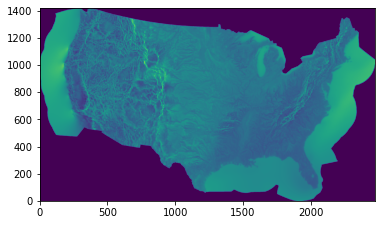

In [16]:
#img = np.dstack(b1) 
f = plt.figure() 
plt.imshow(b1, origin='lower') 
#plt.savefig('Tiff.png') 
plt.show() 

In [ ]:
# Import necessary packages
import os
import rioxarray as rxr
import earthpy as et

# Get data and set working directory
et.data.get_data("../data/us-wind-data/wtk_conus_40m_mean_masked.tif")
os.chdir(os.path.join(et.io.HOME,
                      'earth-analytics',
                      'data'))
#Downloading from https://ndownloader.figshare.com/files/16371473
#Extracted output to /root/earth-analytics/data/colorado-flood/.

In [4]:
da = xr.open_rasterio('../data/us-wind-data/wtk_conus_80m_mean_masked.tif')
transform = Affine.from_gdal(*da.attrs['transform']) # this is important to retain the geographic attributes from the file

ModuleNotFoundError: No module named 'rasterio'

In [ ]:
pip install xarray

In [2]:
import xarray as xr

In [15]:
pip install rasterio

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\heath\anaconda3\envs\geospatial\python.exe' 'C:\Users\heath\anaconda3\envs\geospatial\lib\site-packages\pip\_vendor\pep517\_in_process.py' get_requires_for_build_wheel 'C:\Users\heath\AppData\Local\Temp\tmpcogx2mx9'
       cwd: C:\Users\heath\AppData\Local\Temp\pip-install-rcm6umod\rasterio
  Complete output (22 lines):
  Traceback (most recent call last):
    File "C:\Users\heath\anaconda3\envs\geospatial\lib\site-packages\pip\_vendor\pep517\_in_process.py", line 280, in <module>
      main()
    File "C:\Users\heath\anaconda3\envs\geospatial\lib\site-packages\pip\_vendor\pep517\_in_process.py", line 263, in main
      json_out['return_val'] = hook(**hook_input['kwargs'])
    File "C:\Users\heath\anaconda3\envs\geospatial\lib\site-packages\pip\_vendor\pep517\_in_process.py", line 114, in get_requires_for_build_wheel
      return hook(config_settings)
    File "C:\Users\heath\AppData\Local\Temp\pip-build-env-6zw1dfb

  Using cached rasterio-1.1.8.tar.gz (2.1 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


In [14]:
import rasterio

ModuleNotFoundError: No module named 'rasterio'

In [19]:
import numpy as np
import folium

image = np.zeros((61, 61))
image[0, :] = 1.0
image[60, :] = 1.0
image[:, 0] = 1.0
image[:, 60] = 1.0

In [23]:
m = folium.Map([37, 0], zoom_start=2)

image = b1

folium.raster_layers.ImageOverlay(
    image=image,
    bounds=[[0, -60], [60, 60]],
    colormap=lambda x: (1, 0, 0, x),
).add_to(m)

m

In [25]:
#image = np.zeros((61, 1))

#image[45, :] = 1.0
image = b1


m = folium.Map([37, 0], zoom_start=3)

folium.raster_layers.ImageOverlay(
    image=image,
    bounds=[[0, -60], [60, 60]],
    colormap=lambda x: (0, 1, 0, x),
    origin="lower",
).add_to(m)

folium.PolyLine([[45, -60], [45, 60]]).add_to(m)

m

TypeError: __init__() missing 1 required positional argument: 'bounds'

In [37]:

m = folium.Map([37, 60], zoom_start=3)

#folium.PolyLine([[45, -60], [45, 60]]).add_to(m)

folium.raster_layers.ImageOverlay(
    image=image,
    bounds=[[0, -60], [60, 60]],
    origin="lower",
    colormap=lambda x: (0, 0, 1, x),
    mercator_project=True,
).add_to(m)

m